# Prediction Model



In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# %matplotlib notebook

In [2]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immoCollect52-clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [3]:
print(df.shape)
df.head()

(40791, 17)


,postal_code,type_of_property,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
6,1650,0,525000,4,220,1,1,1,0,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,0,549000,4,210,1,1,1,1,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,0,519000,3,273,1,0,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,0,535000,4,200,1,1,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
13,1421,0,105000,1,82,0,0,1,0,Braine-l'Alleud,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-2.645463


In [4]:
# I retrieve only utils columns for my model
df = df.iloc[:,0:9]
df.drop(columns=['fully_equipped_kitchen'],inplace=True)

In [5]:
df_house = df[df['type_of_property'] == 0]
df_apartment = df[df['type_of_property'] == 1]

In [6]:
df_apartment.head()

,postal_code,type_of_property,price,number_of_bedroom,house_area,terrace,garden,is_new
5519,4000,1,45000,1,47,1,0,0
5520,4020,1,25000,1,125,1,0,1
5521,4020,1,25000,3,142,1,0,1
5523,6180,1,20000,1,115,0,1,0
5524,1030,1,50000,2,96,0,0,0


In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18494 entries, 6 to 59161
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   postal_code        18494 non-null  int64
 1   type_of_property   18494 non-null  int64
 2   price              18494 non-null  int64
 3   number_of_bedroom  18494 non-null  int64
 4   house_area         18494 non-null  int64
 5   terrace            18494 non-null  int64
 6   garden             18494 non-null  int64
 7   is_new             18494 non-null  int64
dtypes: int64(8)
memory usage: 1.3 MB


## Let's train and predict for HOUSE !

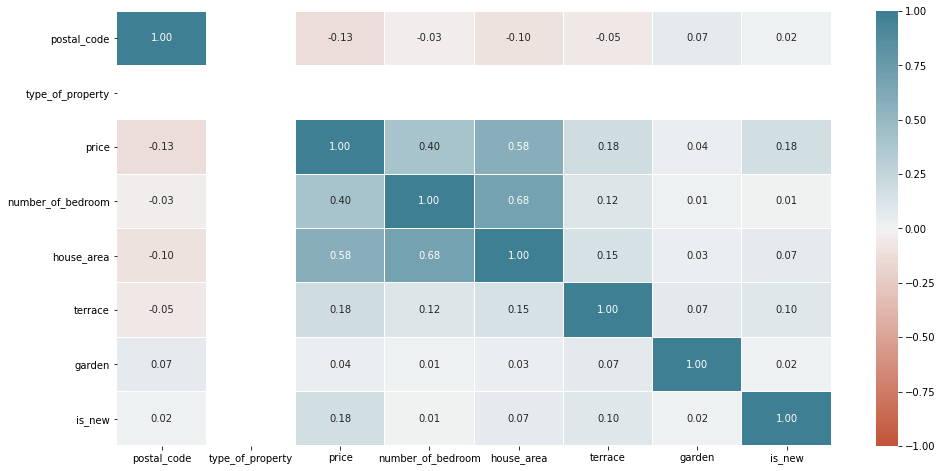

In [8]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df_apartment.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [9]:
X = df_apartment.drop(columns=['price', 'type_of_property', 'garden'])
X.head()

,postal_code,number_of_bedroom,house_area,terrace,is_new
5519,4000,1,47,1,0
5520,4020,1,125,1,1
5521,4020,3,142,1,1
5523,6180,1,115,0,0
5524,1030,2,96,0,0


In [10]:
y = df_apartment[['price']]
y.head()

,price
5519,45000
5520,25000
5521,25000
5523,20000
5524,50000


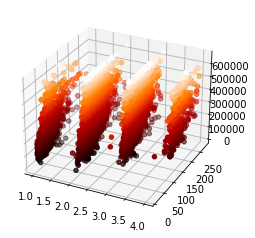

In [11]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

### Split the dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [13]:
X_train

,postal_code,number_of_bedroom,house_area,terrace,is_new
12947,1480,2,105,0,0
13821,1970,1,60,1,1
10982,8370,2,64,0,0
11866,3800,1,81,0,1
5884,8434,1,38,1,0
...,...,...,...,...,...
19683,1210,2,91,1,1
30138,8300,4,138,1,1
12238,8500,2,71,0,0
6840,8530,1,46,0,0


### Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 1. Multiple Linear regression

In [15]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) # Entrainement du model

LinearRegression()

In [16]:
score = regressor.score(X_train,y_train)
score

0.3736021772189966

In [17]:
score = regressor.score(X_test,y_test)
score

0.35144449487022156

### 2. With polynomial regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 5

pipe=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [20]:
pipe.score(X_train, y_train)

0.5196820797293935

In [21]:
pipe.score(X_test, y_test)

0.4889178122170116

### 3. KNN Regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
knn.score(X_train, y_train)

0.7527494924885041

In [24]:
knn.score(X_test, y_test)

0.5871897382124843

### 4. Decision Trees

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=20, random_state=42)

In [26]:
regressor.score(X_train, y_train)

0.6998425795823167

In [27]:
regressor.score(X_test, y_test)

0.6308500322877406

### 5. Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

<ipython-input-28-158bccde1789>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


RandomForestRegressor(max_depth=2, random_state=0)

In [29]:
regr.score(X_train, y_train)

-0.4506959658521392

In [30]:
regr.score(X_test, y_test)

-0.4271494655155974

### 6.Gradient boost

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42, n_estimators=1000)
reg.fit(X_train, y_train)

/home/leersla/Desktop/Turing4/ImmoEliza-API/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [32]:
reg.score(X_train, y_train)

0.7635053246045332

In [33]:
reg.score(X_test, y_test)

0.7225570877452995

### 7. XGB

In [34]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=800, learning_rate=0.04)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb_model.score(X_train, y_train)

0.8196178155650661

In [36]:
xgb_model.score(X_test, y_test)

0.7432276183648872

In [37]:
y_pred = xgb_model.predict(X_test)
r2_score(y_test, y_pred)


0.7432276183648872

### CatBoostRegressor

In [38]:
from catboost import CatBoostRegressor

cbr_model = CatBoostRegressor(learning_rate=0.01, depth=9, iterations=10000, random_seed=42, loss_function='RMSE', od_type='Iter')
fit_model = cbr_model.fit(X_train,
                          y_train,
                          eval_set=(X_test, y_test),
                          use_best_model=True,
                          early_stopping_rounds=10,
                          verbose=100)

print(fit_model.get_params())

0:	learn: 112648.9024746	test: 112839.8760968	best: 112839.8760968 (0)	total: 61.8ms	remaining: 10m 17s
100:	learn: 81487.7540529	test: 83386.2668482	best: 83386.2668482 (100)	total: 1.27s	remaining: 2m 4s
200:	learn: 72066.7221218	test: 74452.1326624	best: 74452.1326624 (200)	total: 2.21s	remaining: 1m 47s
300:	learn: 68266.9096041	test: 70777.4304204	best: 70777.4304204 (300)	total: 3.03s	remaining: 1m 37s
400:	learn: 66185.0629981	test: 68730.9795815	best: 68730.9795815 (400)	total: 4.25s	remaining: 1m 41s
500:	learn: 64854.9902216	test: 67434.7920521	best: 67434.7920521 (500)	total: 5.28s	remaining: 1m 40s
600:	learn: 63895.8711444	test: 66562.1228234	best: 66562.1228234 (600)	total: 6.17s	remaining: 1m 36s
700:	learn: 63157.9612983	test: 65886.3529909	best: 65886.3529909 (700)	total: 7.19s	remaining: 1m 35s
800:	learn: 62525.7587971	test: 65338.6022207	best: 65338.4784154 (799)	total: 8.39s	remaining: 1m 36s
900:	learn: 61936.2163936	test: 64824.6127253	best: 64824.6127253 (900)	t

In [39]:
fit_model.score(X_test, y_test)

-3729.987679837972

In [40]:
y_pred = fit_model.predict(X_test)
r2_score(y_test, y_pred)

0.728709619853394

## Pickle it

In [41]:
# import pickle
# tup = (xgb_model, ss)
# pickle.dump(tup, open("model_bin/apart_model.p", "wb" ))